Week 04 Statistical Machine Learning in Bioinformatics: Model Selection vs Cross Validation
Thomas & Iker
Feb 2022, last update: 2025-02-14
Goals for the R session
Practice model selection on a simulated example

Apply model selection to the ALS regression dataset

Compare models selection relying on AIC with model choice using Cross validation

A first glimpse of model selection on a simulated data
Q0 Simulate a dataset

Simulate data (and save it as dataframe or tibble) consisting of 200 observations where you have a highly non linear relationship between predictors: y=β0+β1x+β2x2+β3x3+ϵ
, where x
 ϵ
 are sampled in normal distribution with mean μ=0
 and σ=1
 .

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Set the seed for reproducibility
np.random.seed(1)

# Define the coefficients
beta_0 = 3
beta_1 = 2
beta_2 = -3
beta_3 = 0.3

# Generate the predictor variable x with mean 0 and standard deviation 1
X = np.random.normal(0, 1, 200)

# Generate the error term epsilon with mean 0 and standard deviation 1
epsilon = np.random.normal(0, 1, 200)

# Calculate the response variable y
Y = beta_0 + beta_1 * X + beta_2 * (X ** 2) + beta_3 * (X ** 3) + epsilon

# Create a DataFrame
quick_df = pd.DataFrame({'X': X, 'Y': Y})

# Display the first few rows of the DataFrame
print(quick_df.head())

          X         Y
0  1.624345 -0.781932
1 -0.611756  1.409071
2 -0.528172  0.500252
3 -1.072969 -1.015424
4  0.865408  1.346512


Q1

In [7]:
# Initialize lists to store BIC, adjusted R^2, and Cp values
bic_values = []
adj_r2_values = []
cp_values = []

# Estimate error variance from the full model (degree 10)
full_model = sm.OLS(quick_df['Y'], PolynomialFeatures(10).fit_transform(quick_df[['X']])).fit()
sigma2_hat = full_model.scale  # Error variance estimate

# Fit models with increasing polynomial degrees
for degree in range(1, 11):  # From 1 to 10
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(quick_df[['X']])

    # Fit the model
    model = sm.OLS(quick_df['Y'], X_poly).fit()

    # Calculate BIC
    bic = model.bic
    bic_values.append(bic)

    # Calculate adjusted R^2
    adj_r2 = 1 - (1 - model.rsquared) * (len(quick_df) - 1) / (len(quick_df) - degree - 1)
    adj_r2_values.append(adj_r2)

    # Calculate Mallows' Cp
    rss = np.sum(model.resid ** 2)
    cp = rss / sigma2_hat - len(quick_df) + 2 * (degree + 1)
    cp_values.append(cp)

# Find the best model according to BIC, adjusted R^2, and Cp
best_bic_degree = bic_values.index(min(bic_values)) + 1
best_adj_r2_degree = adj_r2_values.index(max(adj_r2_values)) + 1
best_cp_degree = cp_values.index(min(cp_values)) + 1

best_bic_degree, best_adj_r2_degree, min(bic_values), max(adj_r2_values), best_cp_degree, min(cp_values)

(3,
 9,
 np.float64(599.6603195577861),
 np.float64(0.9455694150284856),
 9,
 np.float64(9.1571653910529))

Q2

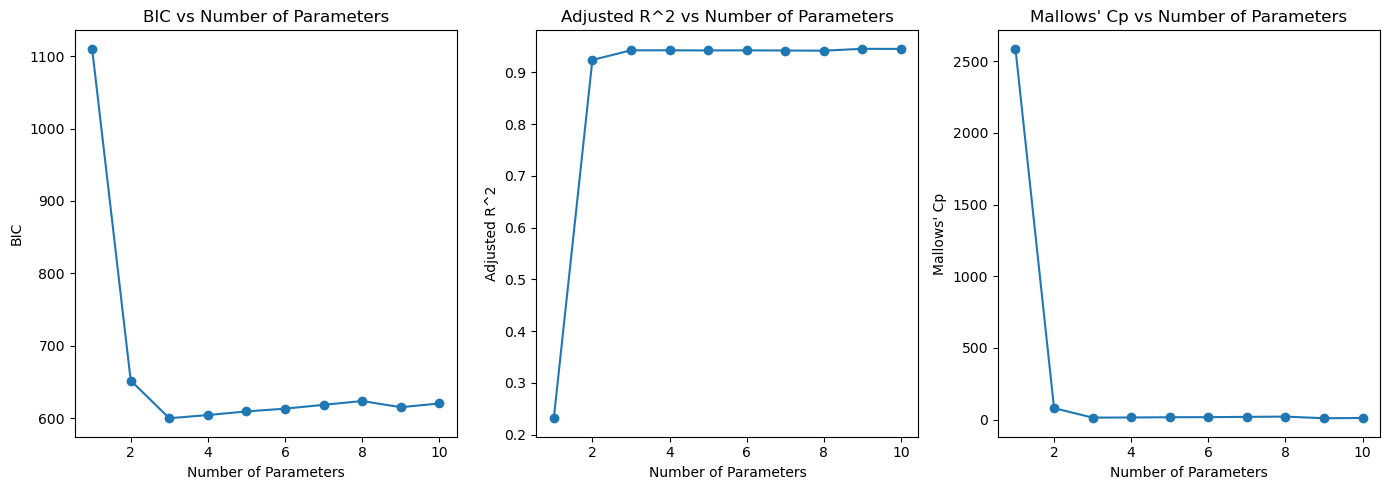

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Simulate the dataset
np.random.seed(1)
beta_0 = 3
beta_1 = 2
beta_2 = -3
beta_3 = 0.3

X = np.random.normal(0, 1, 200)
epsilon = np.random.normal(0, 1, 200)
Y = beta_0 + beta_1 * X + beta_2 * (X ** 2) + beta_3 * (X ** 3) + epsilon
quick_df = pd.DataFrame({'X': X, 'Y': Y})

# Initialize lists to store BIC, adjusted R^2, and Cp values
bic_values = []
adj_r2_values = []
cp_values = []

# Estimate error variance from the full model (degree 10)
full_model = sm.OLS(quick_df['Y'], PolynomialFeatures(10).fit_transform(quick_df[['X']])).fit()
sigma2_hat = full_model.scale  # Error variance estimate

# Fit models with increasing polynomial degrees
for degree in range(1, 11):  # From 1 to 10
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(quick_df[['X']])

    # Fit the model
    model = sm.OLS(quick_df['Y'], X_poly).fit()

    # Calculate BIC
    bic = model.bic
    bic_values.append(bic)

    # Calculate adjusted R^2
    adj_r2 = 1 - (1 - model.rsquared) * (len(quick_df) - 1) / (len(quick_df) - degree - 1)
    adj_r2_values.append(adj_r2)

    # Calculate Mallows' Cp
    rss = np.sum(model.resid ** 2)
    cp = rss / sigma2_hat - len(quick_df) + 2 * (degree + 1)
    cp_values.append(cp)

# Plotting the results
degrees = list(range(1, 11))

plt.figure(figsize=(14, 5))

# Plot for BIC
plt.subplot(1, 3, 1)
plt.plot(degrees, bic_values, marker='o', linestyle='-')
plt.xlabel('Number of Parameters')
plt.ylabel('BIC')
plt.title('BIC vs Number of Parameters')

# Plot for Adjusted R^2
plt.subplot(1, 3, 2)
plt.plot(degrees, adj_r2_values, marker='o', linestyle='-')
plt.xlabel('Number of Parameters')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 vs Number of Parameters')

# Plot for Mallows' Cp
plt.subplot(1, 3, 3)
plt.plot(degrees, cp_values, marker='o', linestyle='-')
plt.xlabel('Number of Parameters')
plt.ylabel('Mallows\' Cp')
plt.title('Mallows\' Cp vs Number of Parameters')

plt.tight_layout()
plt.show()


Q3

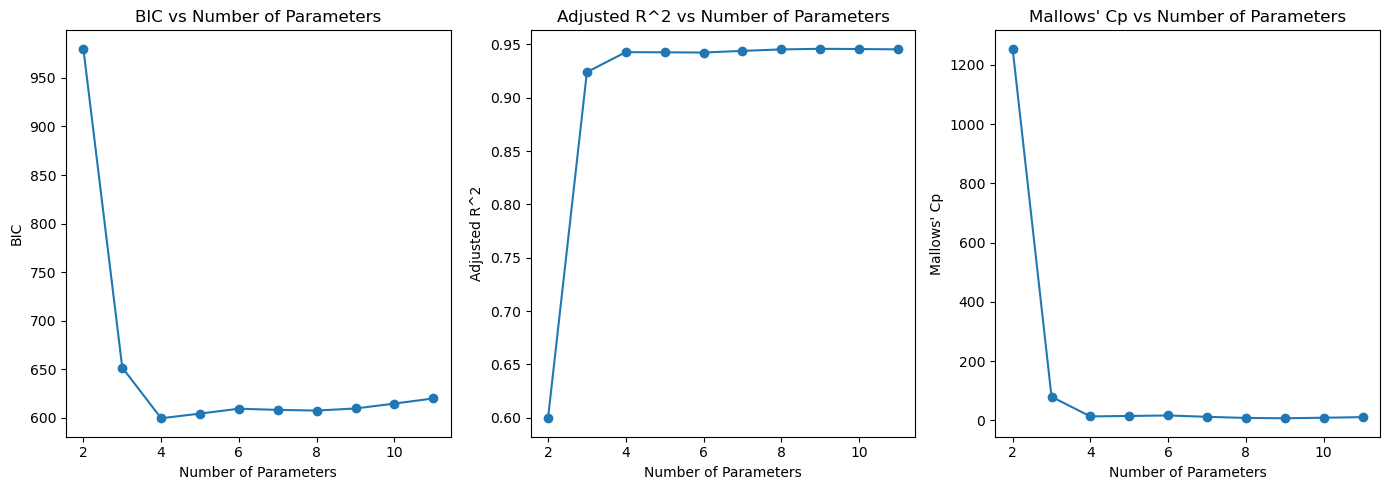

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Simulate the dataset
np.random.seed(1)
beta_0 = 3
beta_1 = 2
beta_2 = -3
beta_3 = 0.3

X = np.random.normal(0, 1, 200)
epsilon = np.random.normal(0, 1, 200)
Y = beta_0 + beta_1 * X + beta_2 * (X ** 2) + beta_3 * (X ** 3) + epsilon
quick_df = pd.DataFrame({'X': X, 'Y': Y})

# Initialize lists to store BIC, adjusted R^2, and Cp values
bic_values = []
adj_r2_values = []
cp_values = []
degrees = []

# Estimate error variance from the full model (degree 10)
full_model = sm.OLS(quick_df['Y'], PolynomialFeatures(10).fit_transform(quick_df[['X']])).fit()
sigma2_hat = full_model.scale  # Error variance estimate

# Start with the full model
current_degree = 10
X_poly = PolynomialFeatures(current_degree).fit_transform(quick_df[['X']])
current_model = sm.OLS(quick_df['Y'], X_poly).fit()

# Perform backward stepwise selection
while current_degree > 0:
    # Calculate BIC, adjusted R^2, and Cp for the current model
    bic = current_model.bic
    adj_r2 = 1 - (1 - current_model.rsquared) * (len(quick_df) - 1) / (len(quick_df) - current_degree - 1)
    rss = np.sum(current_model.resid ** 2)
    cp = rss / sigma2_hat - len(quick_df) + 2 * (current_degree + 1)

    # Store the values
    bic_values.append(bic)
    adj_r2_values.append(adj_r2)
    cp_values.append(cp)
    degrees.append(current_degree + 1)  # Store the number of parameters

    # Remove the least significant term
    if current_degree == 1:
        break
    max_p_value_index = current_model.pvalues[1:].argmax()  # Exclude intercept
    X_poly = np.delete(X_poly, max_p_value_index + 1, 1)  # Adjust index for deletion
    current_model = sm.OLS(quick_df['Y'], X_poly).fit()
    current_degree -= 1

# Plotting the results
plt.figure(figsize=(14, 5))

# Plot for BIC
plt.subplot(1, 3, 1)
plt.plot(degrees, bic_values, marker='o', linestyle='-')
plt.xlabel('Number of Parameters')
plt.ylabel('BIC')
plt.title('BIC vs Number of Parameters')

# Plot for Adjusted R^2
plt.subplot(1, 3, 2)
plt.plot(degrees, adj_r2_values, marker='o', linestyle='-')
plt.xlabel('Number of Parameters')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 vs Number of Parameters')

# Plot for Mallows' Cp
plt.subplot(1, 3, 3)
plt.plot(degrees, cp_values, marker='o', linestyle='-')
plt.xlabel('Number of Parameters')
plt.ylabel('Mallows\' Cp')
plt.title('Mallows\' Cp vs Number of Parameters')

plt.tight_layout()
plt.show()


In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Set seed
np.random.seed(1)

# Generate data
X = np.random.randn(200)
epsilon = np.random.randn(200)

# True coefficients
beta_0, beta_1, beta_2, beta_3 = 1, 2, -1.5, 0.5
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

# Function to fit a model and return metrics
def fit_and_evaluate(X, Y):
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    rss = np.sum(model.resid ** 2)
    bic = model.bic
    adj_r2 = model.rsquared_adj
    num_params = model.df_model + 1
    return model, rss, bic, adj_r2, num_params

# Generate full polynomial terms
X_poly = np.column_stack([X**i for i in range(1, 11)])
full_model, full_rss, _, _, full_params = fit_and_evaluate(X_poly, Y)
sigma_squared = full_rss / (len(Y) - full_params)

# Backward stepwise selection
current_features = list(range(1, 11))  # Polynomial degrees
best_models = []

while len(current_features) > 1:  # Stop before removing the last feature
    models = []
    
    for subset in combinations(current_features, len(current_features) - 1):
        X_subset = np.column_stack([X**i for i in subset])  # Ensure valid input
        model, rss, bic, adj_r2, num_params = fit_and_evaluate(X_subset, Y)
        cp = rss / sigma_squared - (len(Y) - 2 * num_params)
        models.append((subset, bic, adj_r2, cp))
    
    # Select best model at each step based on BIC (as in regsubsets)
    best_model = min(models, key=lambda x: x[1])  # Select min BIC model
    best_models.append(best_model)
    current_features = list(best_model[0])  # Update features

# Convert to DataFrame
results_df = pd.DataFrame(best_models, columns=["Features", "BIC", "Adjusted R2", "Cp"])

# Best models by criteria
best_bic_features = results_df.loc[results_df["BIC"].idxmin(), "Features"]
best_adj_r2_features = results_df.loc[results_df["Adjusted R2"].idxmax(), "Features"]
best_cp_features = results_df.loc[results_df["Cp"].idxmin(), "Features"]

print(f"Best model according to BIC: Degree {len(best_bic_features)}")
print(f"Best model according to Adjusted R2: Degree {len(best_adj_r2_features)}")
print(f"Best model according to Cp: Degree {len(best_cp_features)}")


Best model according to BIC: Degree 3
Best model according to Adjusted R2: Degree 8
Best model according to Cp: Degree 8


In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Set seed for reproducibility
np.random.seed(1)

def generate_data():
    """Generate data with true polynomial degree 3."""
    X = np.random.randn(100)
    epsilon = np.random.randn(100)
    beta_0, beta_1, beta_2, beta_3 = 1, 2, -1.5, 0.5
    Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon
    return X, Y

def fit_and_evaluate(X_mat, Y):
    """Fit a linear model and return BIC and number of parameters."""
    X_design = sm.add_constant(X_mat)
    model = sm.OLS(Y, X_design).fit()
    bic = model.bic
    num_params = model.df_model + 1  # includes intercept
    return bic, num_params

def backward_selection_all_steps(X, Y):
    """
    Performs backward selection on polynomial predictors 1 to 10.
    Records the best BIC at each model size.
    Returns a list of tuples: (model_size, features, bic)
    """
    # Start with all 10 predictors
    current_features = list(range(1, 11))
    candidate_models = []
    
    # Evaluate full model
    X_poly_full = np.column_stack([X**i for i in current_features])
    full_bic, _ = fit_and_evaluate(X_poly_full, Y)
    candidate_models.append((len(current_features), tuple(current_features), full_bic))
    
    # Backward elimination: remove one predictor at a time
    while len(current_features) > 1:
        models_this_round = []
        # Consider dropping each predictor in the current set
        for subset in combinations(current_features, len(current_features) - 1):
            X_subset = np.column_stack([X**i for i in subset])
            bic, _ = fit_and_evaluate(X_subset, Y)
            models_this_round.append((subset, bic))
        
        # Select the subset with the lowest BIC for this round
        best_subset, best_bic = min(models_this_round, key=lambda x: x[1])
        candidate_models.append((len(best_subset), best_subset, best_bic))
        current_features = list(best_subset)
    
    return candidate_models

# Simulation: run 100 datasets and record the selected model size by BIC
num_simulations = 100
correct_selections = 0
true_degree = 3  # The correct model (the true relationship is degree 3)

for _ in range(num_simulations):
    X, Y = generate_data()
    candidate_models = backward_selection_all_steps(X, Y)
    # Choose the model (among all sizes) with the minimum BIC:
    best_model = min(candidate_models, key=lambda x: x[2])
    selected_degree = best_model[0]  # model size (number of predictors)
    if selected_degree == true_degree:
        correct_selections += 1

accuracy = correct_selections / num_simulations * 100
print(f"BIC correctly selects degree {true_degree} in {accuracy:.2f}% of simulations.")


BIC correctly selects degree 3 in 45.00% of simulations.


In [21]:
import pyreadr
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# ----------------------------
# Step 1. Load the ALS Data
# ----------------------------
# Read the RDS file (make sure the file is in your working directory)
result = pyreadr.read_r('ALS_progression_rate.1822x370.rds')
# pyreadr returns a dictionary; we extract the first (and likely only) object.
data = list(result.values())[0]
print("Original Data shape:", data.shape)
print("Columns:", data.columns.tolist())

# Drop rows with missing values
data = data.dropna()
print("Data shape after dropping NaNs:", data.shape)

# Assume the response variable is named 'progression_rate'
response = 'progression_rate'
if response not in data.columns:
    # Fallback: use the first column as response
    response = data.columns[0]
    print("Using", response, "as response variable.")

# Define predictors as all columns except the response
predictors = [col for col in data.columns if col != response]

# ----------------------------
# Step 2. Forward Selection using AIC
# ----------------------------
def forward_selection(data, response, predictors):
    """
    Performs forward selection based on AIC.
    Returns the list of selected predictors and the AIC of the final model.
    """
    selected = []
    remaining = predictors.copy()
    current_score = np.inf
    best_new_score = np.inf

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            # Fit model with predictors already selected plus candidate
            current_predictors = selected + [candidate]
            X = data[current_predictors]
            y = data[response]
            X_const = sm.add_constant(X)
            model = sm.OLS(y, X_const).fit()
            aic = model.aic
            scores_with_candidates.append((aic, candidate))
        scores_with_candidates.sort()  # sort by AIC (lowest first)
        best_new_score, best_candidate = scores_with_candidates[0]
        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print(f"Added {best_candidate:>15}: AIC = {current_score:.2f}")
        else:
            break
    return selected, current_score

print("\nPerforming forward selection based on AIC...")
selected_predictors, aic_forward = forward_selection(data, response, predictors)
print("\nForward selected predictors (total =", len(selected_predictors), "):", selected_predictors)
print("AIC for forward-selected model:", aic_forward)

# ----------------------------
# Step 3. Fit the Full Model for Comparison
# ----------------------------
X_full = data[predictors]
X_full_const = sm.add_constant(X_full)
full_model = sm.OLS(data[response], X_full_const).fit()
aic_full = full_model.aic
print("\nAIC for full model (all predictors):", aic_full)

# ----------------------------
# Step 4. Cross-Validation for Prediction Error
# ----------------------------
def cross_val_error(data, response, predictors, n_splits=10):
    """
    Performs K-fold cross-validation and returns the average mean squared error.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    errors = []
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        X_train = train_data[predictors]
        y_train = train_data[response]
        X_test = test_data[predictors]
        y_test = test_data[response]
        
        X_train_const = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train_const).fit()
        X_test_const = sm.add_constant(X_test)
        predictions = model.predict(X_test_const)
        mse = mean_squared_error(y_test, predictions)
        errors.append(mse)
    return np.mean(errors)

# Compute 10-fold CV error (mean squared error) for both models:
cv_error_forward = cross_val_error(data, response, selected_predictors, n_splits=10)
cv_error_full = cross_val_error(data, response, predictors, n_splits=10)
print("\n10-fold CV error (MSE) for forward-selected model:", cv_error_forward)
print("10-fold CV error (MSE) for full model:", cv_error_full)

# ----------------------------
# Step 5. Discussion
# ----------------------------
print("\nDiscussion:")
print("The forward-selected model (using AIC) is more parsimonious with", len(selected_predictors),
      "predictors and has an AIC of", aic_forward, "compared to the full model's AIC of", aic_full)
print("Its cross-validated mean squared error is", cv_error_forward,
      "versus", cv_error_full, "for the full model.")
print("A difference in CV error indicates that model selection can affect predictive performance.")


Original Data shape: (1822, 370)
Columns: ['dFRS', 'Onset.Delta', 'Symptom.Speech', 'Symptom.WEAKNESS', 'Symptom.OTHER', 'Symptom.Swallowing', 'Symptom.GAIT_CHANGES', 'Symptom.Atrophy', 'Symptom.Cramps', 'Symptom.Fasciculations', 'Symptom.SENSORY_CHANGES', 'Symptom.Stiffness', 'Symptom..', 'Site.of.Onset.Onset..Bulbar', 'Site.of.Onset.Onset..Limb', 'Site.of.Onset.Onset..Limb.and.Bulbar', 'Race...Asian', 'Race...Black.African.American', 'Race...Caucasian', 'Race...Other', 'Age', 'Sex.Female', 'Sex.Male', 'Aunt', 'Aunt..Maternal.', 'Cousin', 'Father', 'Grandfather..Maternal.', 'Grandmother', 'Grandmother..Maternal.', 'Mother', 'Uncle', 'Uncle..Maternal.', 'Uncle..Paternal.', 'Son', 'Daughter', 'Sister', 'Brother', 'Family', 'Neurological.Disease.OTHER', 'Neurological.Disease.STROKE.NOS', 'Neurological.Disease.DEMENTIA.NOS', 'Neurological.Disease.PARKINSON.S.DISEASE', 'Neurological.Disease.DAT', 'Neurological.Disease.ALS', 'Neurological.Disease.BRAIN.TUMOR', 'Neurological.Disease.STROKE.I

ValueError: shapes (162,369) and (370,) not aligned: 369 (dim 1) != 370 (dim 0)